## Gaussian Process
### Tuan Le
### tuanle@hotmail.de

This R jupyter notebook has the purpose to see how a univariate function can be estimated using Gaussian Process. 

#### Drawing functions from a Gaussian process Prior
We can draw functions from a Gaussian process prior. Let's consider $f(x) \propto \mathcal{G}\mathcal{P}(0, k(x, x')$ with squared exponential covariance function:  
$$k(x, x') = exp(-\frac{1}{2l^2}|x - x'|^2), l = 1$$  
  
We:
1. choose a number of input points and write it down in $\mathbf{X}$
2. calculate the corresponding covariance matrix $\mathbf{K} = k(\mathbf{X}, \mathbf{X})$ by plugging in allpairs $\mathbf{x}^{(i)}, \mathbf{x}^{(j)}$ 
3. and finally generate a Gaussian vector $\mathbf{f} \propto \mathcal{N}(\mathbf{0}, \mathbf{K})$

Using 100 equidistant points for $\mathbf{X}$, we repeat the process of generating the Gaussian 10 times (10 different functions) and draw each function by connecting the sampled values.

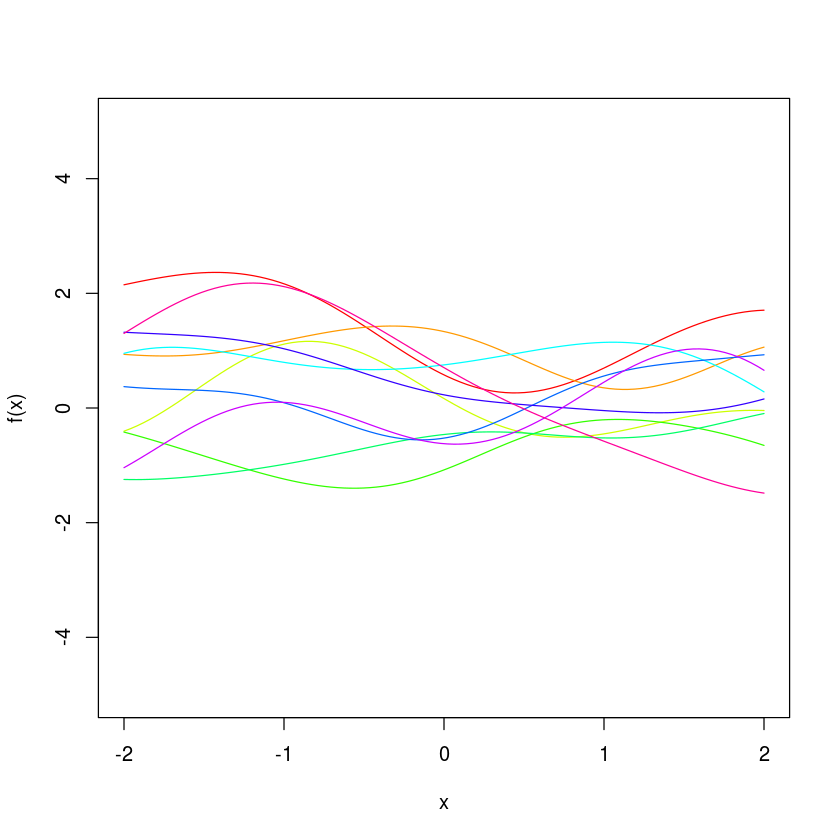

In [1]:
## Create x values in range [-2,2]
x = seq(from = -2, to = 2, length.out = 100)
## Init distance kernel mat
distance_mat = matrix(0, ncol = length(x), nrow = length(x))

## Compute distance for each point to each other point
for (i in seq.int(length(x))) {
  for (j in seq.int(length(x))) {
    distance_mat[i,j] = abs(x[i] - x[j])
  }
}

## Define cov function
squared_exponential_cov_fun = function(d) {
  exp(-1/2*d^2)
}

## Compute "Kernel"/Covariance Matrix
K = apply(distance_mat, MARGIN = c(1,2), function(x) squared_exponential_cov_fun(x))
## Create mean vector to be 0
m = rep(0, length(x))

## Do GP
set.seed(4618)
sampled_functions = vector("list", length = 10L)
names(sampled_functions) = paste("f_", 1:10)
for (i in seq.int(10)) sampled_functions[[i]] = MASS::mvrnorm(n = 1, mu = m, Sigma = K)

plot(x = 0, y = 0 , xlim = c(-2, 2), ylim = c(-5, 5), type = "n", xlab = "x", ylab = "f(x)")
cl =  rainbow(10)

for (i in seq.int(10)){
  lines(x, sampled_functions[[i]] ,col = cl[i], type = "l")
} 

In [2]:
##END